In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import os
from pathlib import Path


Tekstiä

# Wrangle and clip topographic databases

In [ ]:
study_area = gpd.read_file('../data/studyarea.geojson')
mtk_path = Path('../data/mtk/')

## 2005

Topographic database from 2005 is split into map sheets, and each of those contain several `shp` files. Our study is fully covered in four map sheets, `M21O4D`, `M2104C`, `M20O2B` and `M20O2A`. In addition, this dataset ins in `EPSG:2393` coordinates. 

In [ ]:
sheets = [s for s in os.listdir(mtk_path/'2005') if os.path.isdir(mtk_path/'2005'/s)]

### Fields

Fields are found on files with template `M<sheetid>P`, and the class id is `32611`.

In [ ]:
fields = None
for s in sheets:
    temp = gpd.read_file(mtk_path/'2005'/s/f'M{s[1:]}P.SHP')
    temp = temp[temp.LUOKKA == 32611]
    if fields is None: fields = temp
    else: fields = pd.concat([fields, temp])

In [ ]:
fields = fields.to_crs('EPSG:3067')
fields = fields.clip(study_area.iloc[0].geometry)

/opt/conda/lib/python3.9/site-packages/geopandas/tools/clip.py:66: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


<AxesSubplot: >

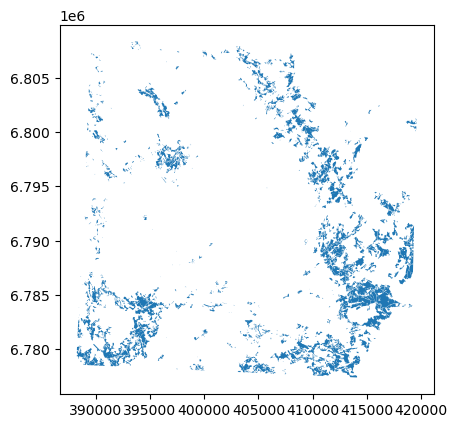

In [ ]:
fields.plot()

In [ ]:
fields.to_file(mtk_path/'2005'/'fields.geojson')

### Roads

Roads are found on files with template `L<sheetid>V`, and the class ids are `12111`, `12112`, `12121`, `12122`, `12131` and `12132`.

In [ ]:
roads = None
for s in sheets:
    temp = gpd.read_file(mtk_path/'2005'/s/f'L{s[1:]}V.SHP')
    temp = temp[temp.LUOKKA.isin([12111,12112,12121,12112,12131,12132])]
    if roads is None: roads = temp
    else: roads = pd.concat([roads, temp])

In [ ]:
roads = roads.to_crs('EPSG:3067')
roads = roads.clip(study_area.iloc[0].geometry)

/opt/conda/lib/python3.9/site-packages/geopandas/tools/clip.py:66: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


<AxesSubplot: >

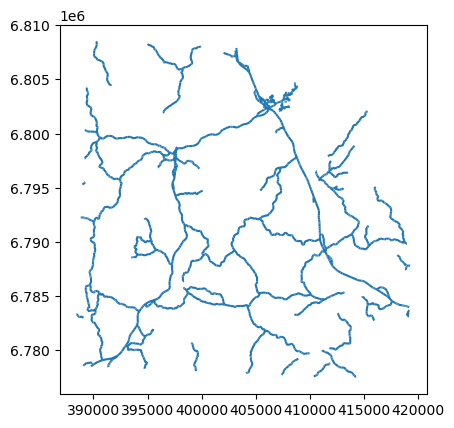

In [ ]:
roads.plot()

In [ ]:
roads.to_file(mtk_path/'2005'/'roads.geojson')

### Marshes

Marshes are found on files with template `M<sheetid>P`, and the class ids are `35411`, `35412`, `35421` and `35422`.

In [ ]:
marshes = None
for s in sheets:
    temp = gpd.read_file(mtk_path/'2005'/s/f'M{s[1:]}P.SHP')
    temp = temp[temp.LUOKKA.isin([35411,35412,35421,35422])]
    if marshes is None: marshes = temp
    else: marshes = pd.concat([marshes, temp])

In [ ]:
marshes = marshes.to_crs('EPSG:3067')
marshes = marshes.clip(study_area.iloc[0].geometry)

/opt/conda/lib/python3.9/site-packages/geopandas/tools/clip.py:66: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


<AxesSubplot: >

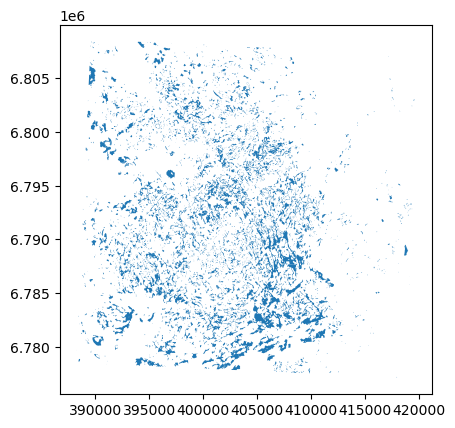

In [ ]:
marshes.plot()

In [ ]:
marshes.to_file(mtk_path/'2005'/'marshes.geojson')

### Waterways

Waterways are found on files with template `M<sheetid>V`, class ids are `36311` and `36312`.

In [ ]:
waterways = None
for s in sheets:
    temp = gpd.read_file(mtk_path/'2005'/s/f'M{s[1:]}V.SHP')
    temp = temp[temp.LUOKKA.isin([36311,36312])]
    if waterways is None: waterways = temp
    else: waterways = pd.concat([waterways, temp])

In [ ]:
waterways = waterways.to_crs('EPSG:3067')
waterways = waterways.clip(study_area.iloc[0].geometry)

/opt/conda/lib/python3.9/site-packages/geopandas/tools/clip.py:66: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


<AxesSubplot: >

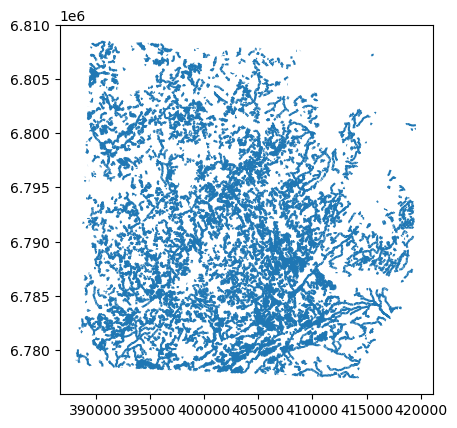

In [ ]:
waterways.plot()

In [ ]:
waterways.to_file(mtk_path/'2005'/'waterways.geojson')

### Water bodies

Water bodies area on files with template `M<sheetid>P`, class ids are `36200`.

In [ ]:
waterbodies = None
for s in sheets:
    temp = gpd.read_file(mtk_path/'2005'/s/f'M{s[1:]}P.SHP')
    temp = temp[temp.LUOKKA.isin([36200])]
    if waterbodies is None: waterbodies = temp
    else: waterbodies = pd.concat([waterbodies, temp])

In [ ]:
waterbodies = waterbodies.to_crs('EPSG:3067')
waterbodies = waterbodies.clip(study_area.iloc[0].geometry)

/opt/conda/lib/python3.9/site-packages/geopandas/tools/clip.py:66: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


<AxesSubplot: >

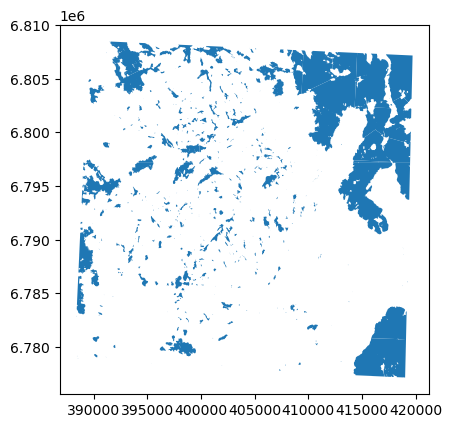

In [ ]:
waterbodies.plot()

In [ ]:
waterbodies.to_file(mtk_path/'2005'/'waterbodies.geojson')

## 2022

Topographic database from 2022 is saved as a single geodatabases for whole Finland, and the databases are:

* MTK-kallio contains rocks and mineral soils
* MTK-korkeussuhteet contains altitude information
* MTK-maastokuvionreuna contains the edges for some classes
* MTK-muut contains the miscillaneous classes, such as meadows and arable land
* MTK-rakennus contains buildings
* MTK-suo contains marshes
* MTK-tie contains the road networks
* MTK-vakavesi contains all water bodies
* MTK-virtavesi contains all waterways

Our analyses require the usage of `MTK-muut`, `MTK-suo`, `MTK-tie`, `MTK-vakavesi` and `MTK-virtavesi`. The class ids are the same as in 2005, and the clipping is done beforehand with QGIS.

# Change analyses

In [ ]:
from itertools import product
from shapely.geometry import Polygon
import numpy as np

def make_grid(area, cell):
    xmin, ymin, xmax, ymax = area.total_bounds
    
    cols = list(np.arange(xmin, xmax+cell, cell))
    rows = list(np.arange(ymin, ymax+cell, cell))
    
    polys = []
    
    for x, y in product(cols[:-1], rows[:-1]):
        polys.append(Polygon([(x,y), (x+cell, y), (x+cell,y+cell),(x, y+cell)]))
    return gpd.GeodDataFrame({'geometry':polys}, crs=area.crs)

In [ ]:
import fiona
from rasterio import features
from rasterio.enums import Resampling
import rasterio as rio

def polygonize(fn, outpath, target_class, scale_factor=1):
    with rio.open(fn) as src:
        im = src.read(out_shape=(src.count, int(src.height*scale_factor),int(src.width*scale_factor)),
                      resampling=Resampling.mode)[0]
        im[im != target_class] = 0
        im[im !=  0] = 1
        mask = im == 1
        tfm = src.transform * src.transform.scale((src.width / im.shape[-1]), (src.height/im.shape[-2]))
        results = ({'properties': {'raster_val': v}, 'geometry': s}
                   for i, (s, v) in enumerate(features.shapes(im, mask==mask, transform=tfm))
                   if v == 1)
        with fiona.open(outpath, 'w', driver='GeoJSON',
                        crs='EPSG:3067',
                        schema={'properties': [('raster_val', 'int')],
                                'geometry': 'Polygon'}) as dst:
            dst.writerecords(results)

Tekstiä

In [ ]:
respath = Path('../results/processed/')
results = os.listdir(respath)

## Fields

In [ ]:
polypath = Path('../results/polygons/')
for r in results:
    polygonize(respath/r, polypath/'fields'/r.replace('tif', 'geojson'), target_class=1, scale_factor=1/2)

In [ ]:
fields_65 = None
fields_80s = None

for p in os.listdir(polypath/'fields'):
    temp = gpd.read_file(polypath/'fields'/p)
    temp['geometry'] = temp.geometry.buffer(10)
    union_geoms = temp.geometry.unary_union
    union_gdf = gpd.GeoDataFrame({'geometry': union_geoms}, crs=temp.crs)
    union_gdf['geometry'] = union_gdf.geometry.buffer(-10)
    union_gdf['geometry'] = union_gdf.geometry.simplify(1)
    if '1965' in p:
        if fields_65 is None: fields_65 = union_gdf
        else: fields_65 = pd.concat((fields_65, union_gdf))
    else:
        if fields_80s is None: fields_80s = union_gdf
        else: fields_80s = pd.concat((fields_80s, union_gdf))

In [ ]:
fields_65.to_file(polypath/'fields_65.geojson')
fields_80s.to_file(polypath/'fields_80s.geojson')

In [ ]:
fields_05 = gpd.read_file(mtk_path/'2005/fields.geojson')
fields_22 = gpd.read_file(mtk_path/'2022/pellot_2022.geojson')

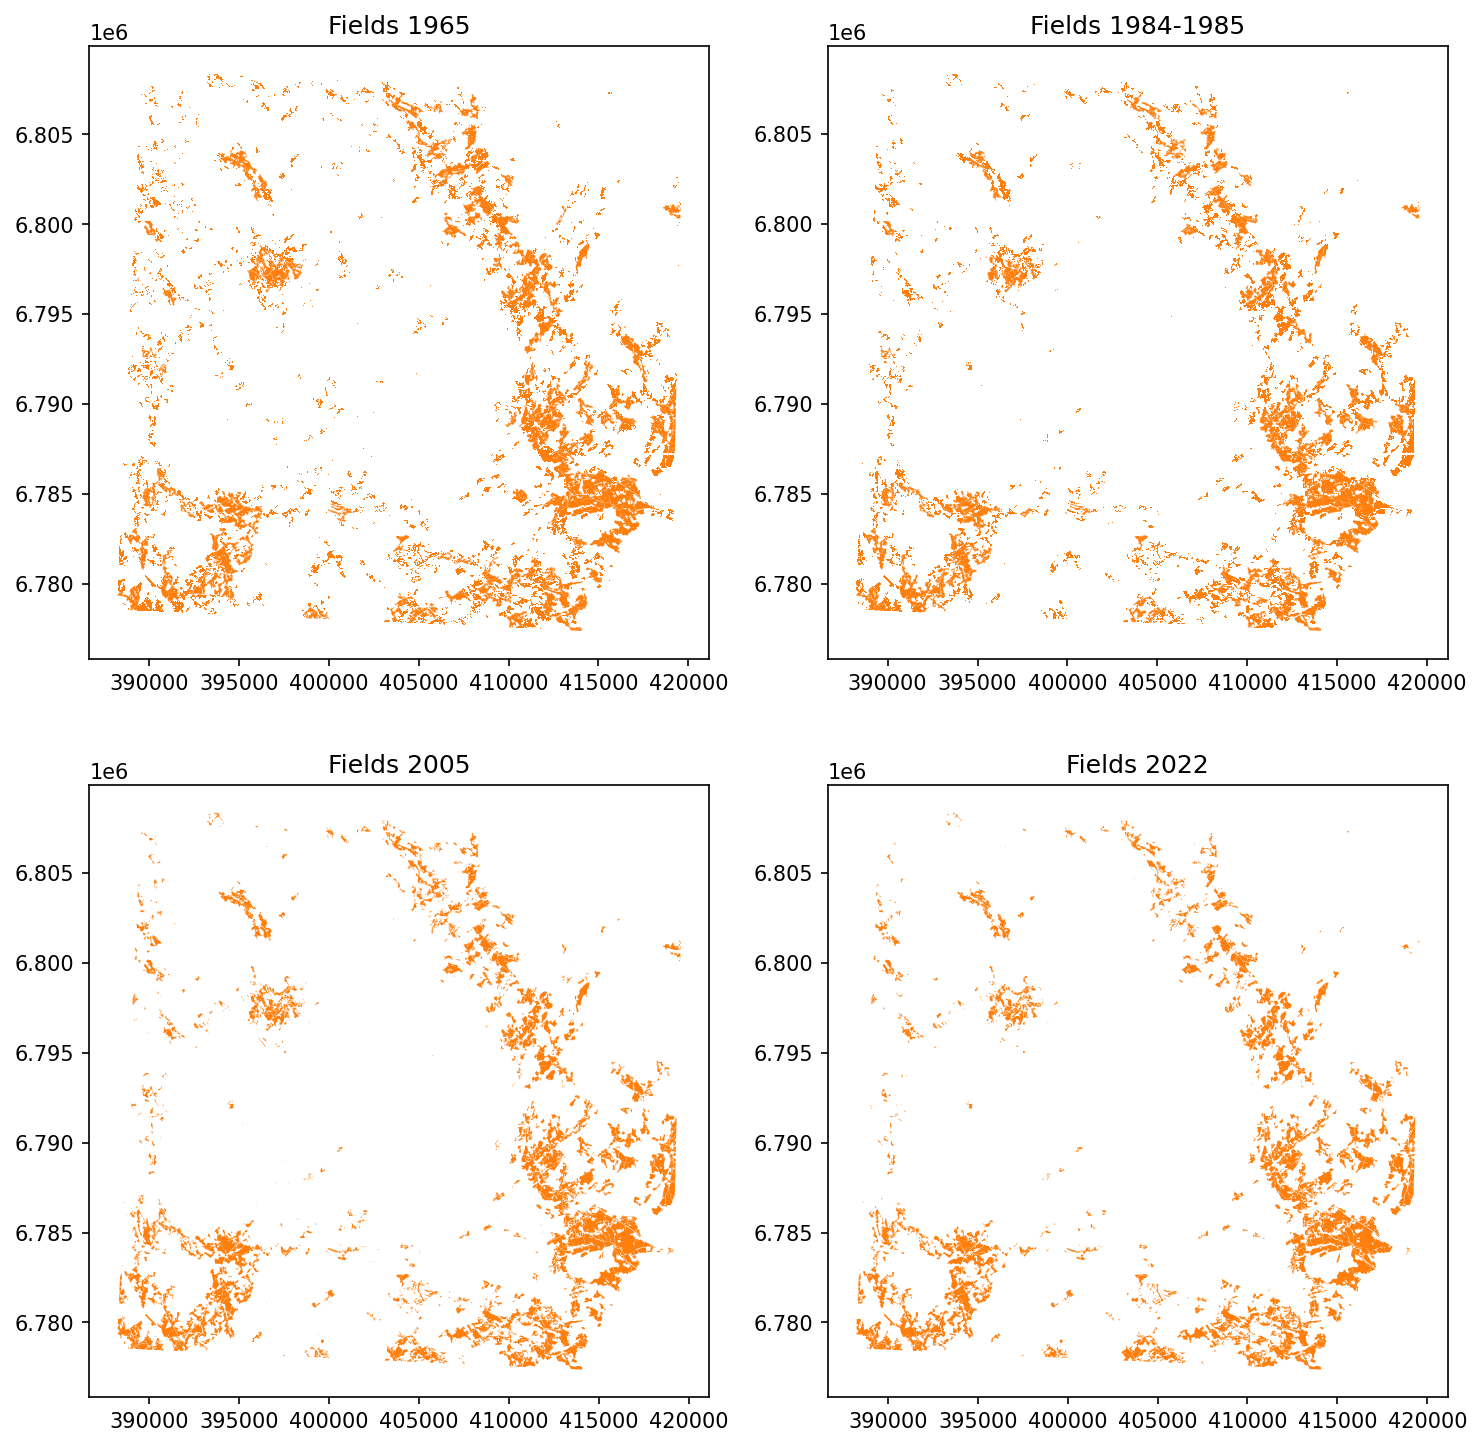

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(10,10), dpi=150)
fields_65.plot(ax=axs[0,0], color='tab:orange')
axs[0,0].set_title('Fields 1965')
fields_80s.plot(ax=axs[0,1], color='tab:orange')
axs[0,1].set_title('Fields 1984-1985')
fields_05.plot(ax=axs[1,0], color='tab:orange')
axs[1,0].set_title('Fields 2005')
fields_22.plot(ax=axs[1,1], color='tab:orange')
axs[1,1].set_title('Fields 2022')
plt.tight_layout()

/opt/conda/lib/python3.9/site-packages/geopandas/geodataframe.py:2352: UserWarning: `keep_geom_type=True` in overlay resulted in 39 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  return geopandas.overlay(
/opt/conda/lib/python3.9/site-packages/geopandas/geodataframe.py:2352: UserWarning: `keep_geom_type=True` in overlay resulted in 26 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  return geopandas.overlay(


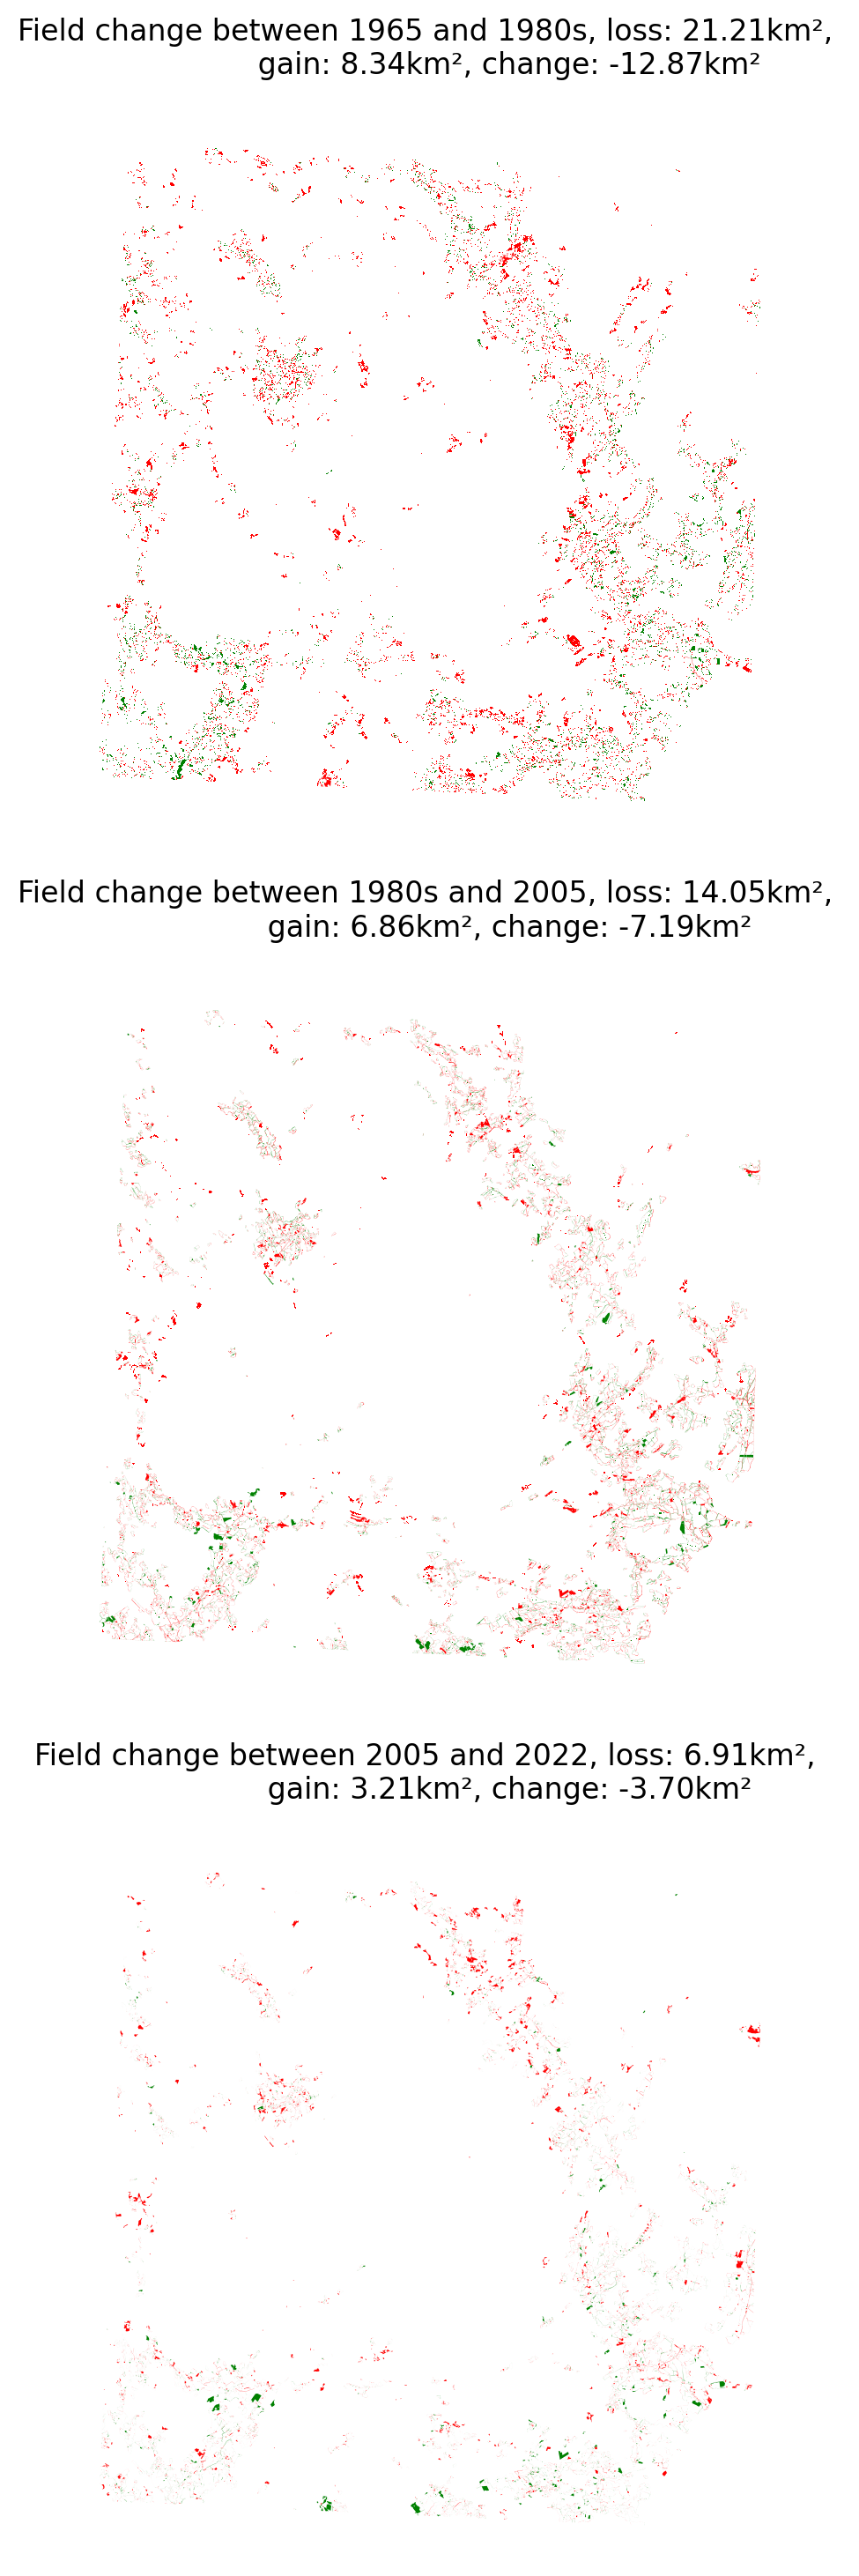

In [ ]:
fig, axs = plt.subplots(3,1, figsize=(6,18), dpi=200)

for ax in axs: ax.axis('off')

loss_80s = fields_65.overlay(fields_80s, how='difference')
gain_80s = fields_80s.overlay(fields_65, how='difference')

loss_05 = fields_80s.overlay(fields_05, how='difference')
gain_05 = fields_05.overlay(fields_80s, how='difference')

loss_22 = fields_05.overlay(fields_22, how='difference')
gain_22 = fields_22.overlay(fields_05, how='difference')

loss_80s.plot(ax=axs[0], color='red')
gain_80s.plot(ax=axs[0], color='green')
axs[0].set_title(f"""Field change between 1965 and 1980s, loss: {(loss_80s.area.sum() * 10**-6):.2f}km², 
                 gain: {(gain_80s.area.sum() * 10**-6):.2f}km², change: {(gain_80s.area.sum() * 10**-6 - loss_80s.area.sum() * 10**-6):.2f}km²""")

loss_05.plot(ax=axs[1], color='red')
gain_05.plot(ax=axs[1], color='green')
axs[1].set_title(f"""Field change between 1980s and 2005, loss: {(loss_05.area.sum() * 10**-6):.2f}km², 
                 gain: {(gain_05.area.sum() * 10**-6):.2f}km², change: {(gain_05.area.sum() * 10**-6 - loss_05.area.sum() * 10**-6):.2f}km²""")

loss_22.plot(ax=axs[2], color='red')
gain_22.plot(ax=axs[2], color='green')
axs[2].set_title(f"""Field change between 2005 and 2022, loss: {(loss_22.area.sum() * 10**-6):.2f}km², 
                 gain: {(gain_22.area.sum() * 10**-6):.2f}km², change: {(gain_22.area.sum() * 10**-6 - loss_22.area.sum() * 10**-6):.2f}km²""")

plt.show()

## Roads

TODO

## Marshes

In [ ]:
for r in results:
    polygonize(respath/r, polypath/'marshes'/r.replace('tif', 'geojson'), target_class=2, scale_factor=1/2)

In [ ]:
marshes_65 = None
marshes_80s = None

for p in os.listdir(polypath/'marshes'):
    temp = gpd.read_file(polypath/'marshes'/p)
    temp['geometry'] = temp.geometry.buffer(10)
    union_geoms = temp.geometry.unary_union
    union_gdf = gpd.GeoDataFrame({'geometry': union_geoms}, crs=temp.crs)
    union_gdf['geometry'] = union_gdf.geometry.buffer(-10)
    union_gdf['geometry'] = union_gdf.geometry.simplify(1)
    if '1965' in p:
        if marshes_65 is None: marshes_65 = union_gdf
        else: marshes_65 = pd.concat((marshes_65, union_gdf))
    else:
        if marshes_80s is None: marshes_80s = union_gdf
        else: marshes_80s = pd.concat((marshes_80s, union_gdf))

In [ ]:
marshes_65.to_file(polypath/'marshes_65.geojson')
marshes_80s.to_file(polypath/'marshes_80s.geojson')

In [ ]:
marshes_05 = gpd.read_file(mtk_path/'2005/marshes.geojson')
marshes_22 = gpd.read_file(mtk_path/'2022/suot_2022.geojson')

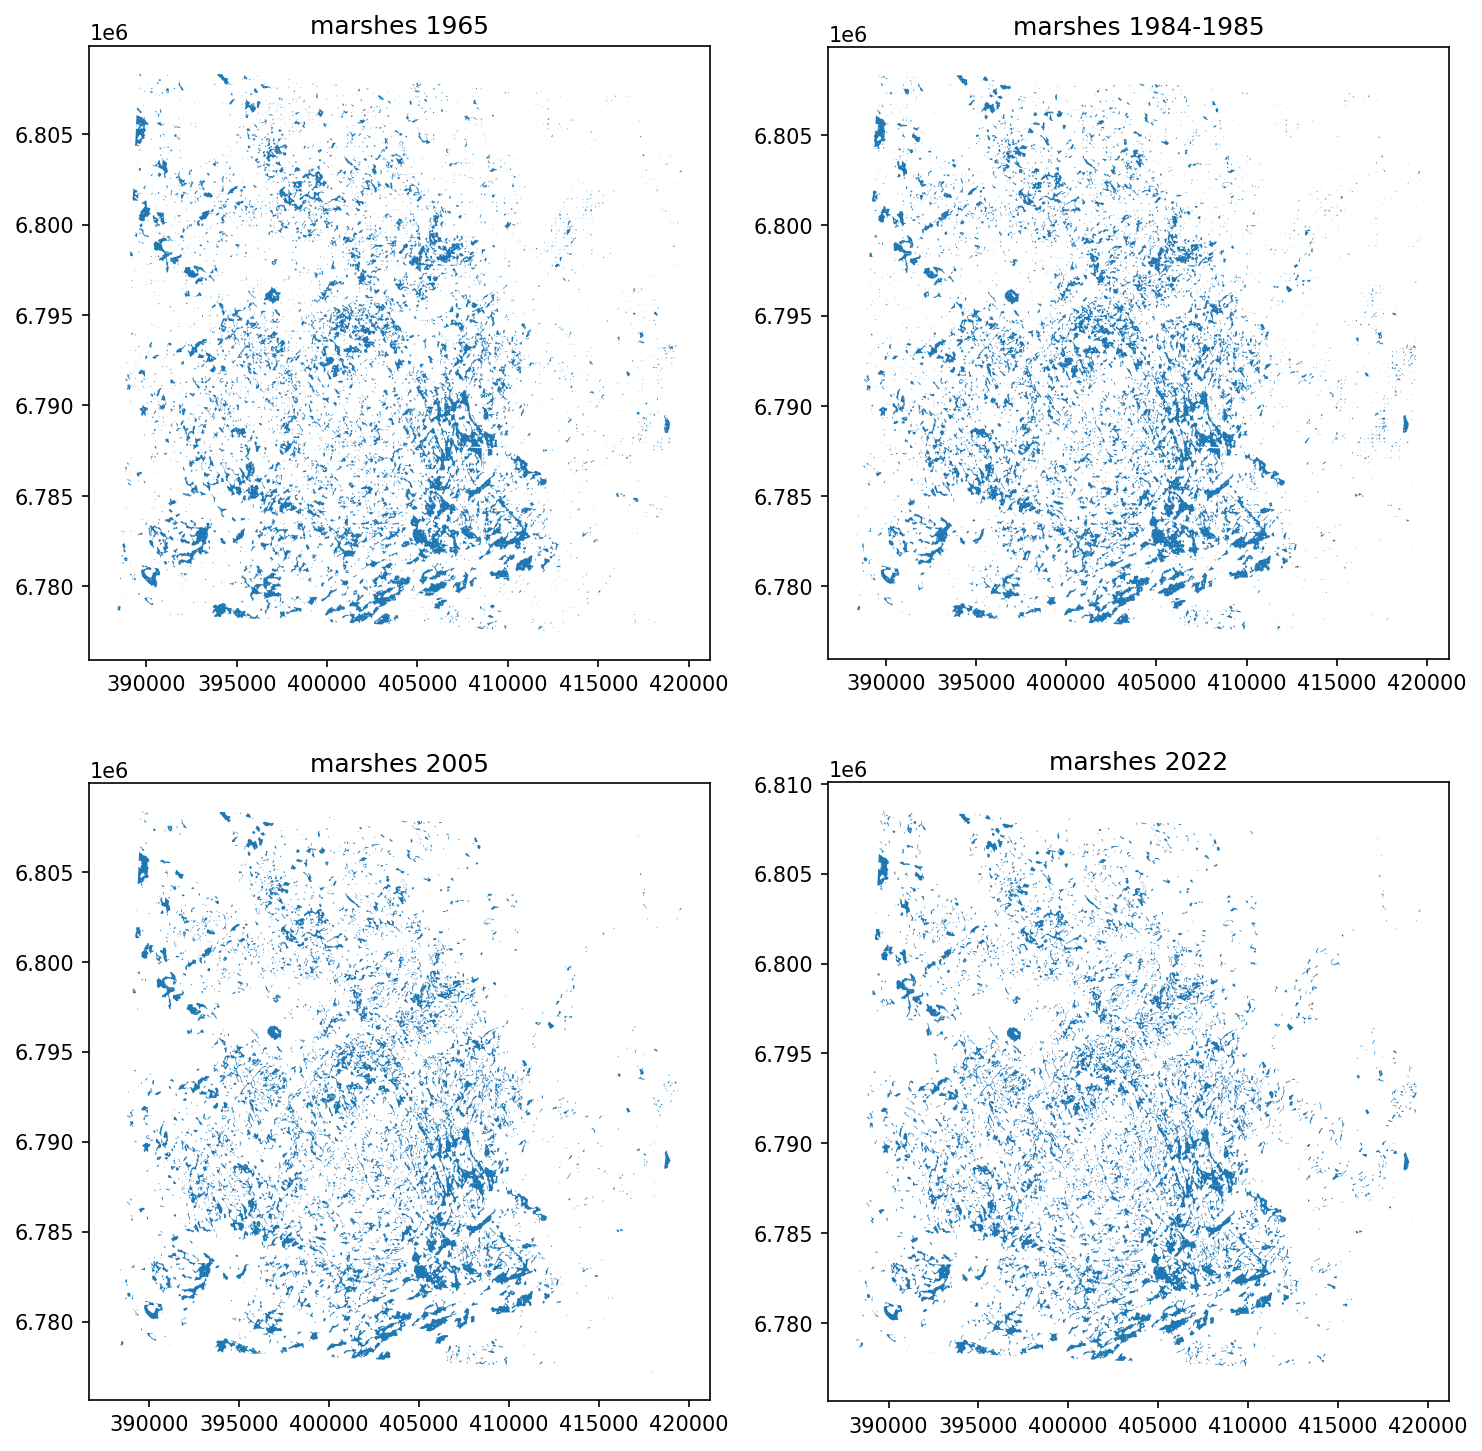

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(10,10), dpi=150)
marshes_65.plot(ax=axs[0,0], color='tab:blue')
axs[0,0].set_title('marshes 1965')
marshes_80s.plot(ax=axs[0,1], color='tab:blue')
axs[0,1].set_title('marshes 1984-1985')
marshes_05.plot(ax=axs[1,0], color='tab:blue')
axs[1,0].set_title('marshes 2005')
marshes_22.plot(ax=axs[1,1], color='tab:blue')
axs[1,1].set_title('marshes 2022')
plt.tight_layout()

/opt/conda/lib/python3.9/site-packages/geopandas/geodataframe.py:2352: UserWarning: `keep_geom_type=True` in overlay resulted in 2 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  return geopandas.overlay(
/opt/conda/lib/python3.9/site-packages/geopandas/geodataframe.py:2352: UserWarning: `keep_geom_type=True` in overlay resulted in 1540 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  return geopandas.overlay(
/opt/conda/lib/python3.9/site-packages/geopandas/geodataframe.py:2352: UserWarning: `keep_geom_type=True` in overlay resulted in 334 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  return geopandas.overlay(


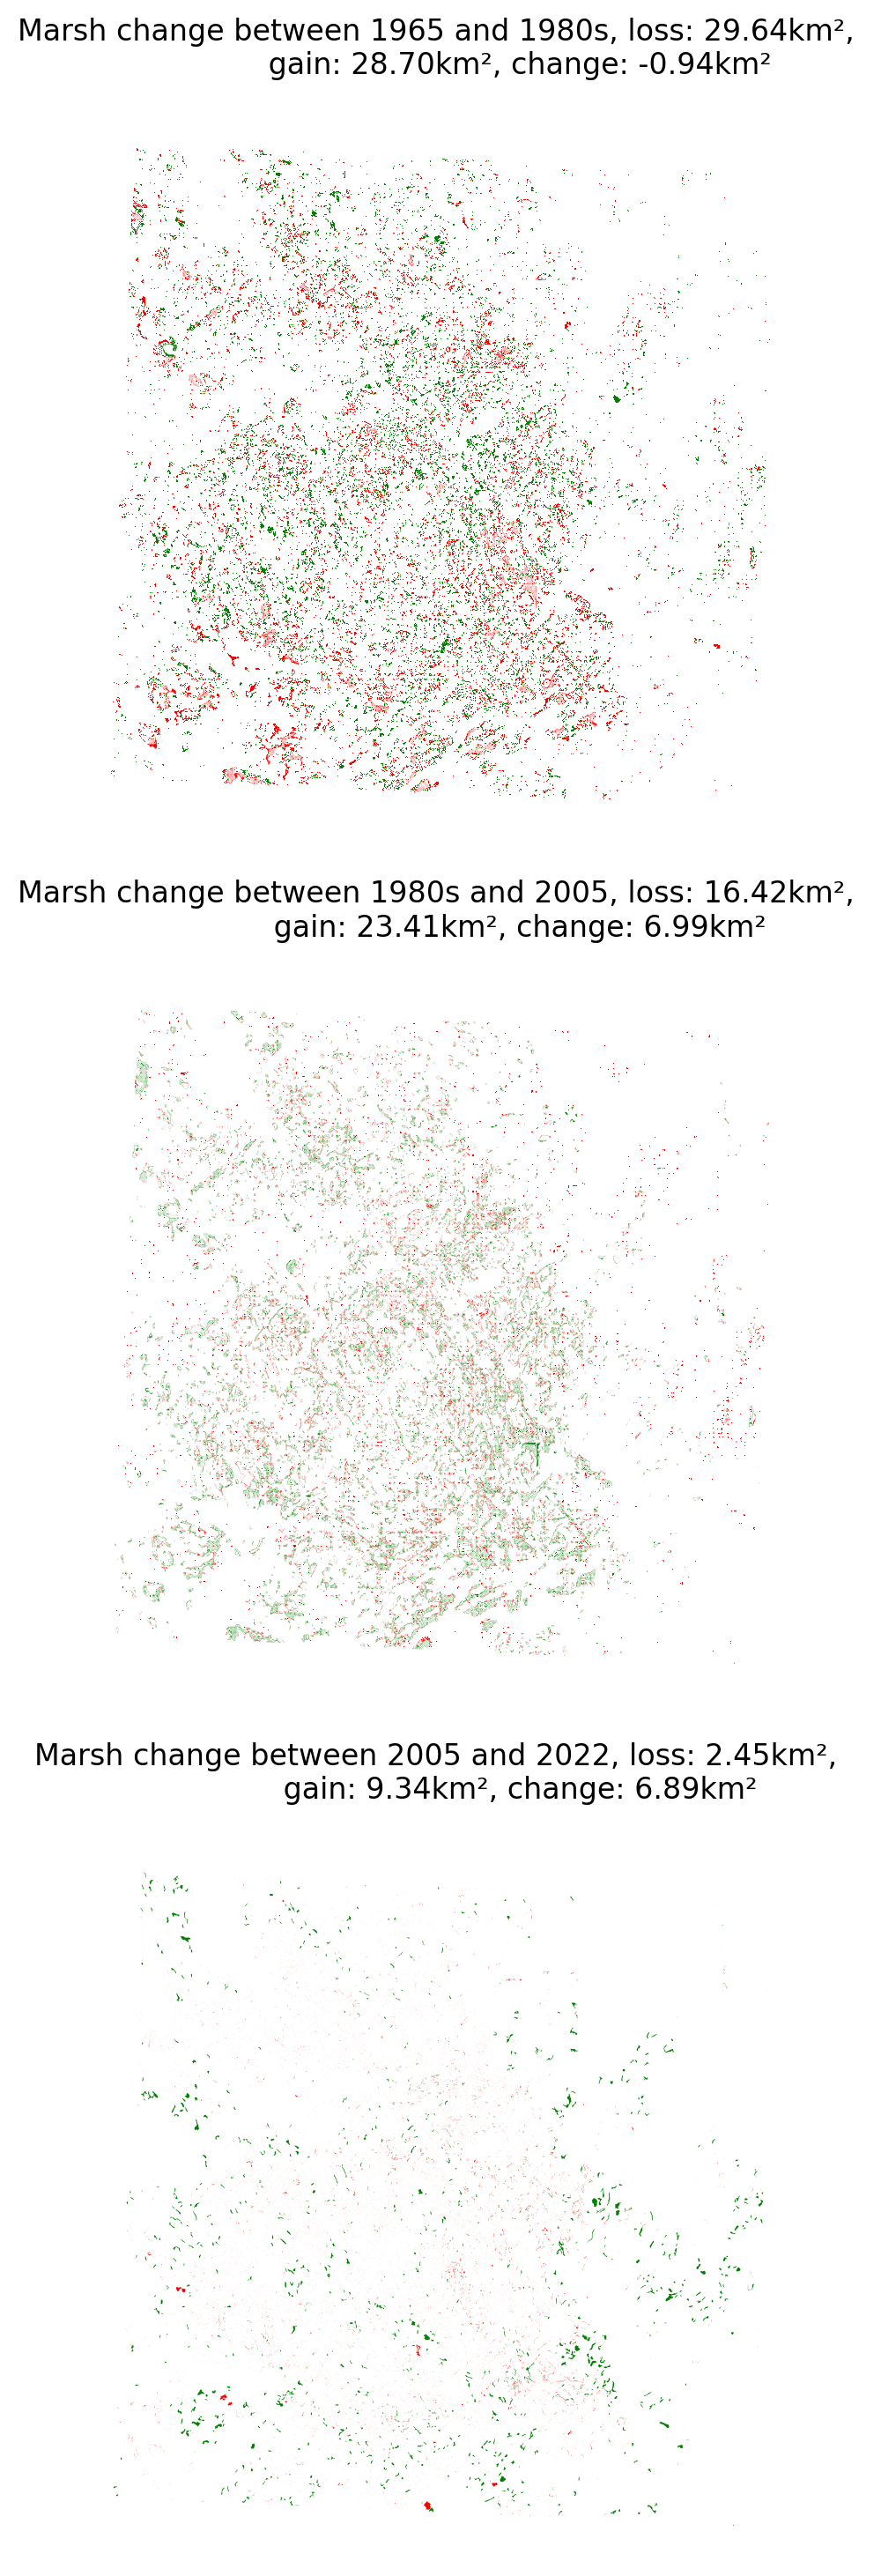

In [ ]:
fig, axs = plt.subplots(3,1, figsize=(6,18), dpi=200)

for ax in axs: ax.axis('off')

loss_80s = marshes_65.overlay(marshes_80s, how='difference')
gain_80s = marshes_80s.overlay(marshes_65, how='difference')

loss_05 = marshes_80s.overlay(marshes_05, how='difference')
gain_05 = marshes_05.overlay(marshes_80s, how='difference')

loss_22 = marshes_05.overlay(marshes_22, how='difference')
gain_22 = marshes_22.overlay(marshes_05, how='difference')

loss_80s.plot(ax=axs[0], color='red')
gain_80s.plot(ax=axs[0], color='green')
axs[0].set_title(f"""Marsh change between 1965 and 1980s, loss: {(loss_80s.area.sum() * 10**-6):.2f}km², 
                 gain: {(gain_80s.area.sum() * 10**-6):.2f}km², change: {(gain_80s.area.sum() * 10**-6 - loss_80s.area.sum() * 10**-6):.2f}km²""")

loss_05.plot(ax=axs[1], color='red')
gain_05.plot(ax=axs[1], color='green')
axs[1].set_title(f"""Marsh change between 1980s and 2005, loss: {(loss_05.area.sum() * 10**-6):.2f}km², 
                 gain: {(gain_05.area.sum() * 10**-6):.2f}km², change: {(gain_05.area.sum() * 10**-6 - loss_05.area.sum() * 10**-6):.2f}km²""")

loss_22.plot(ax=axs[2], color='red')
gain_22.plot(ax=axs[2], color='green')
axs[2].set_title(f"""Marsh change between 2005 and 2022, loss: {(loss_22.area.sum() * 10**-6):.2f}km², 
                 gain: {(gain_22.area.sum() * 10**-6):.2f}km², change: {(gain_22.area.sum() * 10**-6 - loss_22.area.sum() * 10**-6):.2f}km²""")

plt.show()

## Waterways

TODO

## Water bodies